In [78]:
import scanpy as sc
import pandas as pd
import math
import numpy as np
from sklearn import metrics
import torch
# Plotting

import seaborn as sns

# System
from pathlib import Path
import os
from GraphST import GraphST
from GraphST.utils import clustering
import itertools

import pyreadr

# Ensure you are always in the parent dir
os.chdir('/home/kyan/git/cv-scdl3991/')
# data_path = Path('data/MH/MH_raw_counts.csv')
data_path = Path('data/')
output_path = Path('outputs/clustering/')
# Warnings 
import warnings
warnings.simplefilter("ignore")

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# setting seed
torch.manual_seed(17)

## Clustering

In [ ]:


adata1 = sc.read_visium(data_path_DPLC_1,
                       count_file = "151507_filtered_feature_bc_matrix.h5")
adata1.uns['name'] = 'DPLC_151707'


In [ ]:
# for comb in combinations:
#     clusters = comb[0]
#     radius = comb[1]
#     ad = adata1.copy()
#     aris = []
#     for i in range(5):
#         model = GraphST.GraphST(ad, device=device)
#         ad = model.train()
#         if tool == 'mclust':
#             # the authors recommend a refinement step just for the DFPLC dataset
#              clustering(ad, n_clusters, radius=radius, method=tool, refinement=refinement) 
    
#     # filter out NA nodes
#     ad = ad[~pd.isnull(ad.obs['original_clusters'])]

#       # calculate metric ARI
#       ARI = metrics.adjusted_rand_score(ad.obs['domain'], ad.obs['original_clusters'])
#       ad.uns['ARI'] = ARI

#       print('Dataset:', dataset)
#       print('ARI:', ARI)
#       aris.append(ARI)
#    print('Dataset:', dataset)
#    print(aris)
#    print(np.mean(aris))
#    with open('graphst_aris.txt', 'a+') as fp:
#       fp.write('DLPFC' + dataset + ' ')
#       fp.write(' '.join([str(i) for i in aris]))
#       fp.write('\n')

In [5]:
# for comb in combinations:
#     clusters = comb[0]
#     radius = comb[1]
#     ad = adata1.copy()
#     aris = []
#     for i in range(5):
#         model = GraphST.GraphST(ad, device=device)
#         ad = model.train()
#         if tool == 'mclust':
#             # the authors recommend a refinement step just for the DFPLC dataset
#              clustering(ad, n_clusters, radius=radius, method=tool, refinement=refinement) 
    
#         # filter out NA nodes
#           ad = ad[~pd.isnull(ad.obs['original_clusters'])]

#       # calculate metric ARI
#       ARI = metrics.adjusted_rand_score(ad.obs['domain'], ad.obs['original_clusters'])
#       ad.uns['ARI'] = ARI

#       print('Dataset:', dataset)
#       print('ARI:', ARI)
#       aris.append(ARI)
#    print('Dataset:', dataset)
#    print(aris)
#    print(np.mean(aris))
#    with open('graphst_aris.txt', 'a+') as fp:
#       fp.write('DLPFC' + dataset + ' ')
#       fp.write(' '.join([str(i) for i in aris]))
#       fp.write('\n')

## Running for 1 sample first

In [178]:
adata1 = sc.read_visium(data_path_DPLC_1,
                       count_file = "151507_filtered_feature_bc_matrix.h5")
adata1.uns['name'] = 'DPLC_151707'
adata1.var_names_make_unique()

In [7]:
# define model
model = GraphST.GraphST(adata1, device=device)

# train model
adata1 = model.train()

Begin to train ST data...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 82.90it/s]

Optimization finished for ST data!


In [8]:
adata1.obsm['emb']

array([[ 5.36439717e-02,  2.44174406e-01,  5.18082604e-02, ...,
         1.08462420e+01, -1.05006039e-01,  2.39077032e-01],
       [ 2.40946785e-02,  1.64554700e-01,  4.02887464e-02, ...,
         9.70880890e+00,  2.93625802e-01, -5.37430719e-02],
       [ 3.28817777e-02,  2.55273014e-01,  4.34144447e-03, ...,
         9.92446995e+00,  2.74649203e-01,  2.03486398e-01],
       ...,
       [ 1.02450073e-01,  2.11361170e-01, -6.83139712e-02, ...,
         9.48402405e+00, -1.27216205e-01,  6.11639582e-03],
       [ 3.41132656e-02,  4.00655568e-01,  1.59667939e-01, ...,
         9.30976677e+00,  1.23158544e-01,  4.33961779e-01],
       [-6.23877905e-03, -7.50371367e-02, -9.73233301e-03, ...,
         1.07543497e+01,  1.35975331e-01, -1.44588426e-01]], dtype=float32)

In [13]:
# from rpy2.robjects.packages import importr
# utils = importr('utils')

# utils.install_packages('mclust')


In [33]:
merged_df = pd.merge(adata1.obs, gt, left_index=True, right_index=True, how='outer')

In [34]:
adata1.obs = merged_df

In [35]:
adata1.obs

in_tissue  array_row  array_col mclust domain   gt
AAACAACGAATAGTTC-1          1          0         16      2      3  1.0
AAACAAGTATCTCCCA-1          1         50        102      4      4  3.0
AAACAATCTACTAGCA-1          1          3         43      2      2  1.0
AAACACCAATAACTGC-1          1         59         19      6      1  0.0
AAACAGCTTTCAGAAG-1          1         43          9      5      5  6.0
...                       ...        ...        ...    ...    ...  ...
TTGTTGTGTGTCAAGA-1          1         31         77      4      3  3.0
TTGTTTCACATCCAGG-1          1         58         42      5      5  6.0
TTGTTTCATTAGTCTA-1          1         60         30      1      1  0.0
TTGTTTCCATACAACT-1          1         45         27      5      5  6.0
TTGTTTGTGTAAATTC-1          1          7         51      2      2  1.0

[4226 rows x 6 columns]

In [40]:
adata1 = adata1[~pd.isnull(adata1.obs['gt'])]

In [42]:

# calculate metric ARI
ARI = metrics.adjusted_rand_score(adata1.obs['domain'], adata1.obs['gt'])
adata1.uns['ARI'] = ARI

print('ARI:', ARI)

ARI: 0.43144565960377407


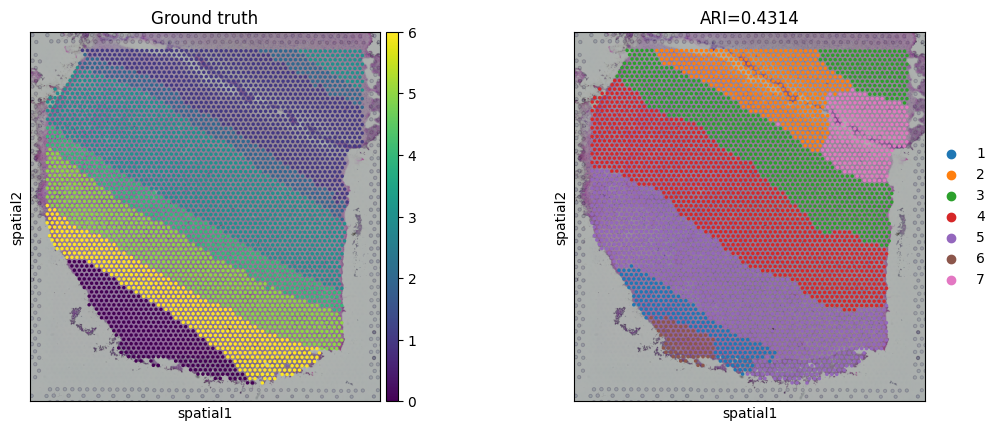

In [43]:
# plotting spatial clustering result
sc.pl.spatial(adata1,
              img_key="hires",
              color=["gt", "domain"],
              title=["Ground truth", "ARI=%.4f"%ARI],
              show=True)

In [166]:
def run_clustering_and_plot(adata, gt, **kwargs):
    adata, clusters, gt = run_clustering(adata, gt, **kwargs)
    ARI = metrics.adjusted_rand_score(adata.obs['domain'], adata.obs['gt'])
    sc.pl.spatial(adata,
              img_key="hires",
              color=["gt", "domain"],
              title=["Ground truth", "ARI=%.4f"%ARI],
              show=True)

Begin to train ST data...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 79.01it/s]


Optimization finished for ST data!
fitting ...
  |======================================================================| 100%


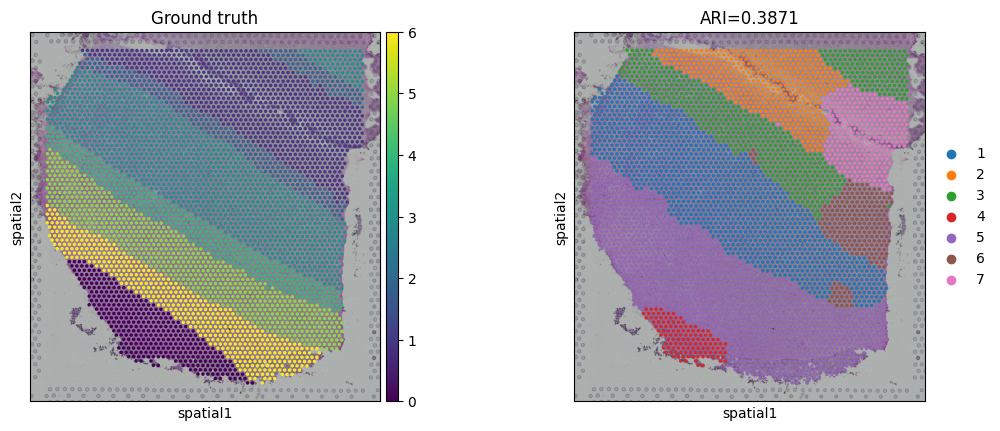

In [171]:
run_clustering_and_plot(adata1, gt1,  n_clusters=7, radius=50, refinement=True)

Begin to train ST data...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 82.78it/s]


Optimization finished for ST data!
fitting ...
  |======================================================================| 100%


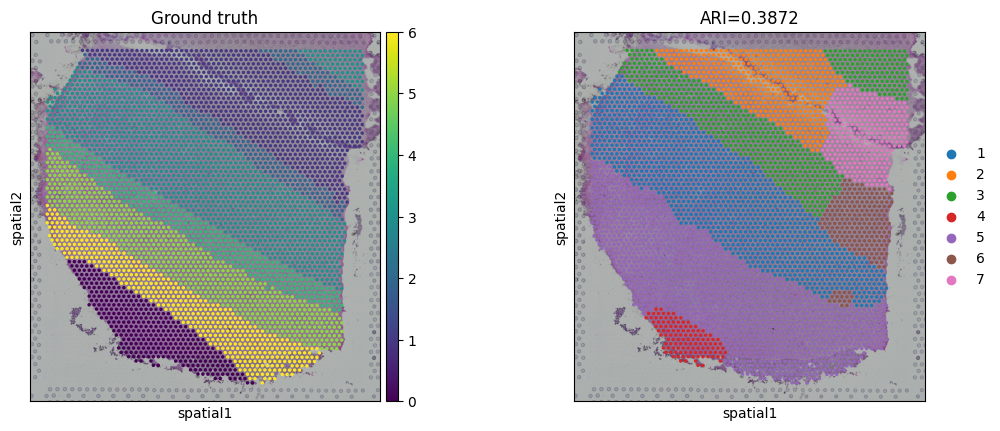

In [174]:
run_clustering_and_plot(adata1, gt1,  n_clusters=7, radius=70, refinement=True)

Begin to train ST data...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 81.14it/s]


Optimization finished for ST data!
fitting ...
  |======================================================================| 100%


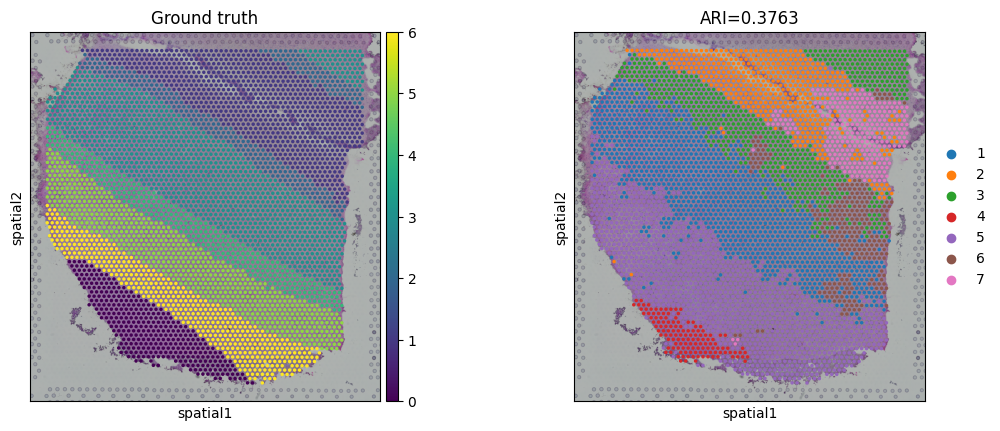

In [172]:
run_clustering_and_plot(adata1, gt1,  n_clusters=7, radius=50, refinement=False)

Begin to train ST data...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 80.87it/s]


Optimization finished for ST data!
fitting ...
  |======================================================================| 100%


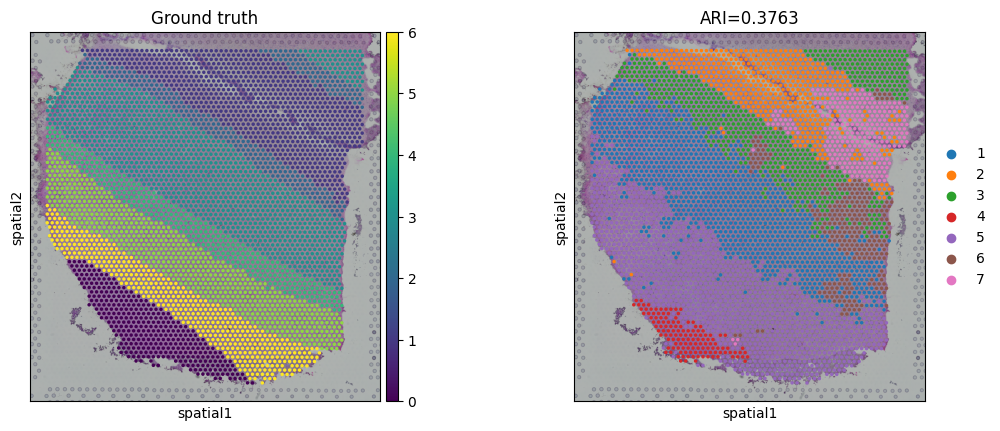

In [173]:
run_clustering_and_plot(adata1, gt1,  n_clusters=7, radius=70, refinement=False)

Begin to train ST data...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 80.64it/s]


Optimization finished for ST data!
fitting ...
  |======================================================================| 100%


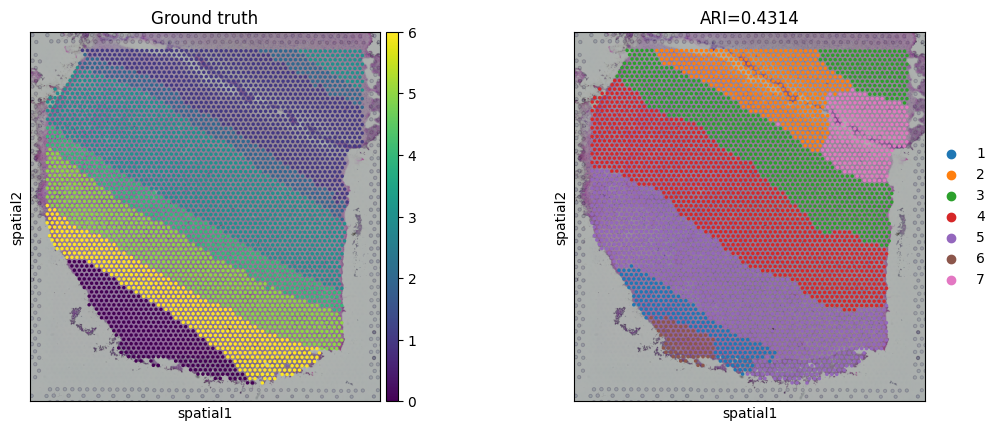

In [179]:
run_clustering_and_plot(adata1, gt1,  n_clusters=7, radius=50, refinement=True)

## Many Loops throughout all samples

In [118]:
def compute_metrics(name, adata, clusters, gt):
    adata = adata[~pd.isnull(adata.obs['gt'])]
    X = adata.X
    # 6 metrics in total
    ARI = metrics.adjusted_rand_score(clusters, gt)
    AMI = metrics.adjusted_mutual_info_score(clusters, gt)
    HOM = metrics.homogeneity_score(clusters, gt)

    # Unsupervised metrics
    SIL = metrics.silhouette_score(X, clusters)
    CH = metrics.calinski_harabasz_score(X.toarray(), clusters)
    DBI = metrics.davies_bouldin_score(X.toarray(), clusters)
    
    return {name: [ARI, AMI, HOM, SIL, CH, DBI]}, ["ARI", "AMI", "HOM", "SIL", "CH", "DBI"]

In [175]:
def run_clustering(adata, gt, **kwargs):
    adata = adata.copy()
    model = GraphST.GraphST(adata, device=device)
    adata = model.train()

    n_clusters = kwargs.get('n_clusters')
    radius = kwargs.get('radius', 50)
    tool = kwargs.get('tool', 'mclust')  # default to 'mclust' if not provided
    refinement = kwargs.get('refinement', False)

    if tool == 'mclust':
       clustering(adata, n_clusters, radius=radius, method=tool, refinement=refinement) # For DLPFC dataset, we use optional refinement step.
    elif tool in ['leiden', 'louvain']:
       clustering(adata, n_clusters, radius=radius, method=tool, start=0.1, end=2.0, increment=0.01, refinement=False)
    
    merged_df = pd.merge(adata.obs, gt, left_index=True, right_index=True, how='outer')
    adata.obs = merged_df
    
    # filter for missing values
    adata = adata[~pd.isnull(adata.obs['gt'])]
    clusters = adata.obs['domain']
    gt = adata.obs['gt']

    return adata, clusters, gt

In [189]:
def run_all_clustering(adata, gt,  save_path, **kwargs):
    save_path = save_path

    adata, clusters, gt = run_clustering(adata, gt, **kwargs)
    dataset_row, columns = compute_metrics(adata.uns['name'], adata, clusters, gt)
    
    ### Adding onto the end of new df
    saved_df = pd.read_csv(save_path, index_col = 0)
    new_df = pd.DataFrame.from_dict(dataset_row, columns = columns, 
                                    orient='index') 
    print(f"Adding entry < {new_df.index} to dataset")

    ### TESTING FOR DUPLICATED COLUMNS
    duplicate_columns = new_df.columns[new_df.columns.duplicated()]
    # Display results
    if duplicate_columns.any():
        print(f"WARNING: Duplicate columns in {new_df.index}:")
        print(duplicate_columns)

    common_columns = saved_df.columns.intersection(new_df.columns)

    print(f"Old Columns: {saved_df.columns} \n")
    print(f"New Columns: {new_df.columns} \n")
    print(f"Common Columns: {common_columns} \n")
    
    # Select only the common columns from both DataFrames
    saved_df_common = saved_df[common_columns]
    new_df_common = new_df[common_columns]

    # Append df2 to df1
    result = pd.concat([saved_df_common, new_df_common], join="inner")
    result.to_csv(save_path, index= True)

    print(f"Saved to disk at path: {save_path}")

## Running for all adatas

In [180]:
data_path_MSC = Path('data/MSC/MSC_gene_expression_FINAL.h5ad')
data_path_DPLC_1 = Path('data/DLPC/151507')
data_path_DPLC_2 = Path('data/DLPC/151508')
data_path_DPLC_3 = Path('data/DLPC/151509')
data_path_HBCA1 = Path('data/HBCA1/')

adata = sc.read_h5ad(data_path_MSC)
adata.uns['name'] = 'MSC'
adata.var_names_make_unique()

adata1 = sc.read_visium(data_path_DPLC_1,
                       count_file = "151507_filtered_feature_bc_matrix.h5")
adata1.uns['name'] = 'DPLC_151707'
adata1.var_names_make_unique()

adata2 = sc.read_visium(data_path_DPLC_2,
                       count_file = "151508_filtered_feature_bc_matrix.h5")
adata2.uns['name'] = 'DPLC_151708'
adata2.var_names_make_unique()

adata3 = sc.read_visium(data_path_DPLC_3,
                       count_file = "151509_filtered_feature_bc_matrix.h5")
adata3.uns['name'] = 'DPLC_151709'
adata3.var_names_make_unique()

adata4 = sc.read_visium(data_path_HBCA1,
                       count_file = "V1_Breast_Cancer_Block_A_Section_1_filtered_feature_bc_matrix.h5")
adata4.uns['name'] = 'HBCA1'
adata4.var_names_make_unique()

In [87]:
def get_gt_df(path):
    gt = pd.read_csv(path, header=None)
    gt['gt'] = gt.iloc[:,-1]
    gt = gt.set_index(0)
    gt = gt[['gt']]
    return gt

In [153]:
df_meta = pd.read_csv('data/HBCA1/gt/gold_metadata.tsv', sep='\t')
df_meta.set_index('ID', inplace = True)
df_meta['gt'] = pd.Categorical(df_meta.iloc[:,-1]).codes

In [162]:
gt = pd.DataFrame(adata.obs['ClusterID']).rename(columns = {'ClusterID':'gt'})
gt1 = get_gt_df('data/DLPC/151507/gt/tissue_positions_list_GTs.txt')
gt2 = get_gt_df('data/DLPC/151508/gt/tissue_positions_list_GTs.txt')
gt3 = get_gt_df('data/DLPC/151509/gt/tissue_positions_list_GTs.txt')
gt4 = df_meta[['gt']]

In [140]:
pd.Categorical(df_meta['gt']).codes

array([18, 10,  5, ..., 10, 15, 14], dtype=int8)

In [138]:
len(df_meta['fine_annot_type'].unique())

20

## Testing a range of samples


In [ ]:
# Clustering over a set of parameters for GraphST

# clusters = range(3,9)
# radius = range(20,70, 10)
# tool = ['mclust']
# refinement= [True, False]

# combinations = itertools.product(clusters, radius, tool, refinement)
# combinations = list(combinations)

# len(combinations)

In [181]:
adata_res, result1, result2 = run_clustering(adata1, gt1, n_clusters=7, radius=50, refinement= True)

Begin to train ST data...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 81.84it/s]


Optimization finished for ST data!
fitting ...
  |======================================================================| 100%


In [182]:
dataset_row, columns = compute_metrics(adata1.uns['name'], adata_res, result1, result2)

In [183]:
new_df = pd.DataFrame.from_dict(dataset_row, columns = columns, 
                                    orient='index') 

In [184]:
save_path = "outputs/clustering/clustering_03_09_1.csv"
new_df.to_csv(save_path, index= True)

In [190]:
run_all_clustering(adata, gt,save_path, n_clusters=8, radius=50, )

Begin to train ST data...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:04<00:00, 130.10it/s]


Optimization finished for ST data!
fitting ...
  |======================================================================| 100%
Adding entry < Index(['MSC'], dtype='object') to dataset
Old Columns: Index(['ARI', 'AMI', 'HOM', 'SIL', 'CH', 'DBI'], dtype='object') 

New Columns: Index(['ARI', 'AMI', 'HOM', 'SIL', 'CH', 'DBI'], dtype='object') 

Common Columns: Index(['ARI', 'AMI', 'HOM', 'SIL', 'CH', 'DBI'], dtype='object') 

Saved to disk at path: outputs/clustering/clustering_03_09_1.csv


In [193]:
run_all_clustering(adata2, gt2, save_path, n_clusters=7, radius=50, refinement=True)

Begin to train ST data...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 78.64it/s]


Optimization finished for ST data!
fitting ...
  |======================================================================| 100%
Adding entry < Index(['DPLC_151708'], dtype='object') to dataset
Old Columns: Index(['ARI', 'AMI', 'HOM', 'SIL', 'CH', 'DBI'], dtype='object') 

New Columns: Index(['ARI', 'AMI', 'HOM', 'SIL', 'CH', 'DBI'], dtype='object') 

Common Columns: Index(['ARI', 'AMI', 'HOM', 'SIL', 'CH', 'DBI'], dtype='object') 

Saved to disk at path: outputs/clustering/clustering_03_09_1.csv


In [192]:
run_all_clustering(adata3, gt3, save_path, n_clusters=7, radius=50, refinement=True)

Begin to train ST data...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:08<00:00, 70.77it/s]


Optimization finished for ST data!
fitting ...
  |======================================================================| 100%
Adding entry < Index(['DPLC_151709'], dtype='object') to dataset
Old Columns: Index(['ARI', 'AMI', 'HOM', 'SIL', 'CH', 'DBI'], dtype='object') 

New Columns: Index(['ARI', 'AMI', 'HOM', 'SIL', 'CH', 'DBI'], dtype='object') 

Common Columns: Index(['ARI', 'AMI', 'HOM', 'SIL', 'CH', 'DBI'], dtype='object') 

Saved to disk at path: outputs/clustering/clustering_03_09_1.csv


In [194]:
run_all_clustering(adata4, gt4,save_path, n_clusters=20, radius=50)

Begin to train ST data...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:06<00:00, 90.77it/s]


Optimization finished for ST data!
fitting ...
  |======================================================================| 100%
Adding entry < Index(['HBCA1'], dtype='object') to dataset
Old Columns: Index(['ARI', 'AMI', 'HOM', 'SIL', 'CH', 'DBI'], dtype='object') 

New Columns: Index(['ARI', 'AMI', 'HOM', 'SIL', 'CH', 'DBI'], dtype='object') 

Common Columns: Index(['ARI', 'AMI', 'HOM', 'SIL', 'CH', 'DBI'], dtype='object') 

Saved to disk at path: outputs/clustering/clustering_03_09_1.csv
